In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [2]:
minst = fetch_openml('mnist_784', version = 1,  as_frame = False)
minst.keys()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
train_img, test_img, train_lbl, test_lbl = train_test_split(minst.data, minst.target, test_size = 1/7.0, random_state = 2)

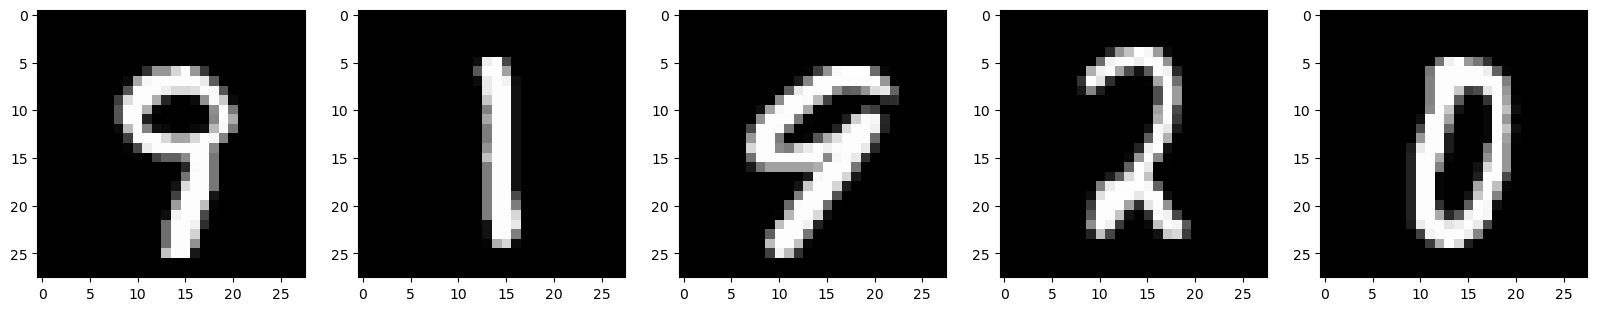

In [4]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(28,28)), cmap = plt.cm.gray)
    

In [5]:
clf = MLPClassifier()

In [6]:
clf.fit(train_img, train_lbl)

MLPClassifier(activation='logistic')

In [7]:
predictions_train = clf.predict(train_img)
predictions_test = clf.predict(test_img)
train_score = accuracy_score(predictions_train, train_lbl)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_lbl)
print("score on test data: ", test_score)

score on train data:  0.95495
score on test data:  0.9499


In [8]:
index = 0
badIndex = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions_train):
    badIndex += 1
    if label != predict:
        misclassifiedIndexes.append(badIndex)
        index += 1
    


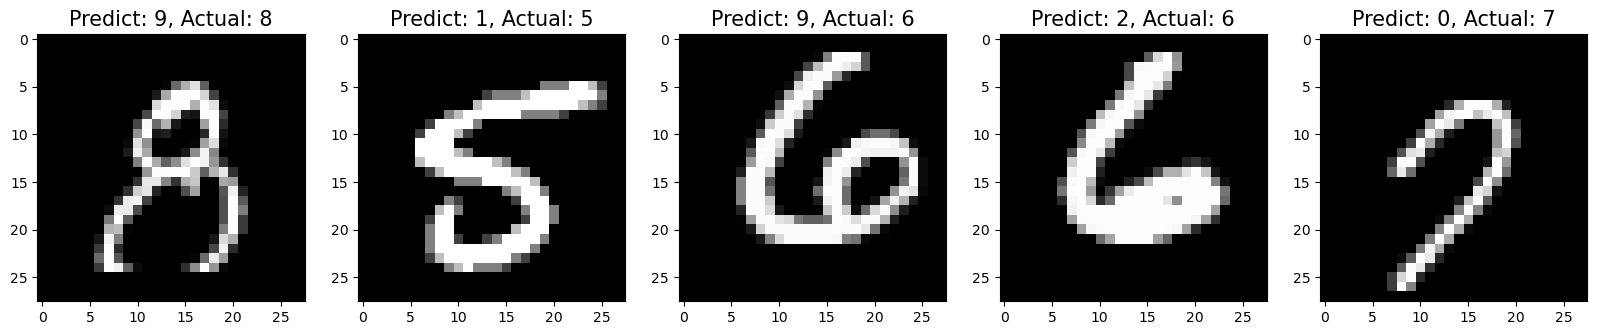

In [9]:
plt.figure(figsize = (20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex +1)
    plt.imshow(np.reshape(test_img[badIndex - 1], (28,28)), cmap = plt.cm.gray)
    plt.title("Predict: {}, Actual: {}".format(predictions_train[badIndex -1 ], test_lbl[badIndex - 1]), fontsize = 15)
               
    

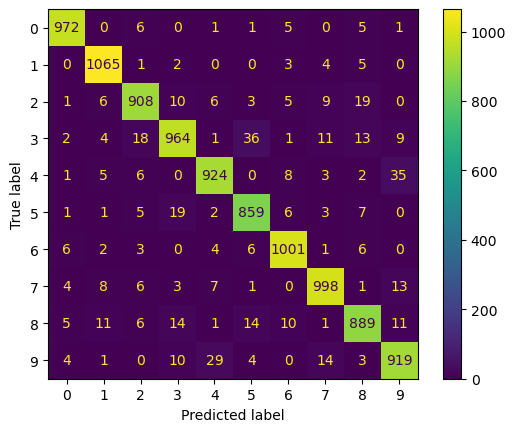

In [10]:
ConfusionMatrixDisplay.from_estimator(clf, test_img, test_lbl)

In [ ]:
train_size,train_scores,test_scores  = learning_curve(clf, train_img, train_lbl, cv = 10, n_jobs = -1, train_sizes = [100, 1000, 10000, 20000,40000,54000], verbose = 1)

[learning_curve] Training set sizes: [  100  1000 10000 20000 40000 54000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
train_mean = np.mean(train_scores, axis = 1)

In [ ]:
train_std = np.std(train_scores, axis = 1)

In [ ]:
test_mean = np.mean(test_scores, axis = 1)

In [ ]:
test_std = np.std(test_scores, axis = 1)

In [ ]:
plt.plot(train_size, train_mean, label = "Training Score")
plt.plot(train_size, test_mean, label = "Cross-Validation Score")

plt.title("learning curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'best')

         